In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

In [2]:
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.0.0


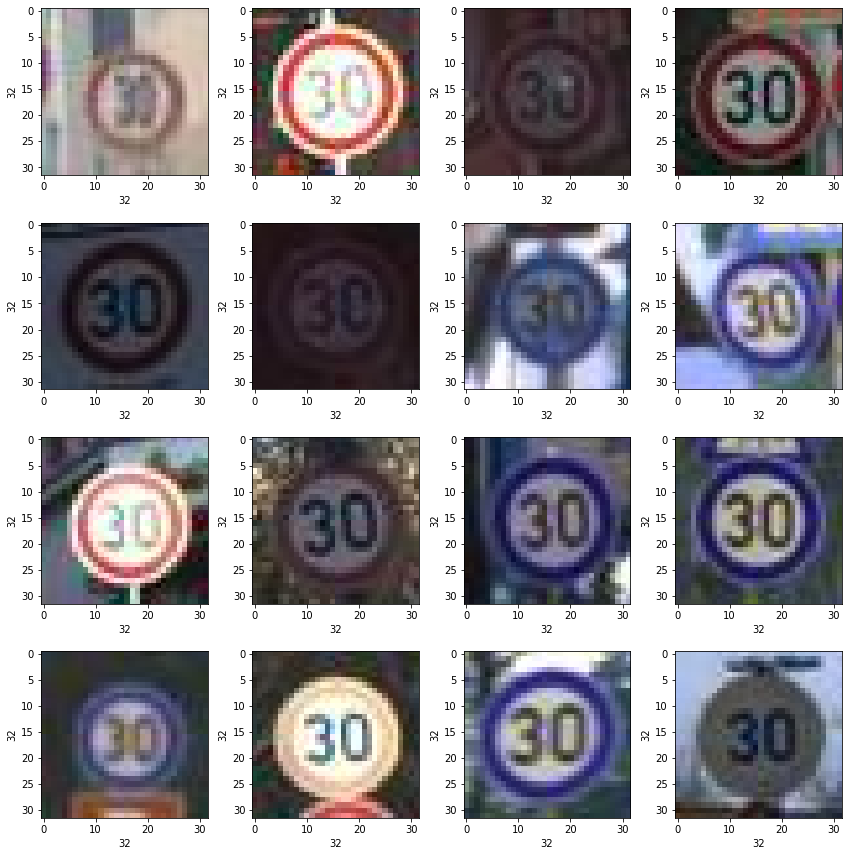

In [3]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "data/image_dataset1/1"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [4]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []
images = []
label_id = []

for i in range(0,43):
    labels = 'data/image_dataset1' + '/'+str(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [5]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  32.0  Dimension 2 Mean :  32.0


In [6]:
label_id = np.array(label_id)
label_id.shape

(73139,)

In [7]:
images = np.array(images)
images.shape

(73139, 32, 32, 3)

In [8]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

1     4920
13    4080
12    3990
38    3930
10    3810
dtype: int64

In [9]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

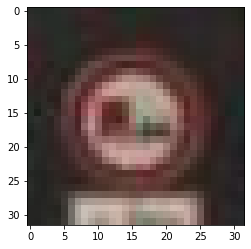

In [17]:
plt.imshow(x_train[15])

In [10]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [11]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

2021-11-21 20:22:21.046624: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-21 20:22:21.048664: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [16]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Train on 58511 samples, validate on 14628 samples
Epoch 1/10
58511/58511 - 26s - loss: 4.5094 - acc: 0.0595 - val_loss: 3.5917 - val_acc: 0.0683
Epoch 2/10
58511/58511 - 23s - loss: 3.5559 - acc: 0.0670 - val_loss: 3.5201 - val_acc: 0.0683
Epoch 3/10
58511/58511 - 23s - loss: 3.5122 - acc: 0.0670 - val_loss: 3.4932 - val_acc: 0.0683
Epoch 4/10
58511/58511 - 23s - loss: 3.4962 - acc: 0.0670 - val_loss: 3.4834 - val_acc: 0.0683
Epoch 5/10
58511/58511 - 23s - loss: 3.4906 - acc: 0.0670 - val_loss: 3.4798 - val_acc: 0.0683
Epoch 6/10
58511/58511 - 23s - loss: 3.4887 - acc: 0.0670 - val_loss: 3.4783 - val_acc: 0.0683
Epoch 7/10
58511/58511 - 23s - loss: 3.4881 - acc: 0.0670 - val_loss: 3.4777 - val_acc: 0.0683
Epoch 8/10
58511/58511 - 23s - loss: 3.4876 - acc: 0.0670 - val_loss: 3.4775 - val_acc: 0.0683
Epoch 9/10
58511/58511 - 23s - loss: 3.4875 - acc: 0.0670 - val_loss: 3.4774 - val_acc: 0.0683
Epoch 10/10
58511/58511 - 23s - loss: 3.4875 - acc: 0.0670 - val_loss: 3.4774 - val_acc: 0.0683